In [100]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn import preprocessing
import warnings
#warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score,roc_curve,plot_roc_curve,auc
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_predict

### Reading data 

In [101]:
# Reading data
data = pd.read_csv("healthcare-dataset-stroke-data.csv", encoding = 'utf-8') 

In [102]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [103]:
# Checking null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [104]:
# Checking datatypes
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [105]:
# Checking distribution of numerical values
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Data Visualization and Manipulation

In [136]:
# Pie chart
def plot_pie(variable, title, labels):
    df_temp = pd.DataFrame(data.groupby([variable]).count()['id'])
    colors = sns.color_palette('pastel')[0:data[variable].nunique()]
    if labels:
        plt.pie(df_temp['id'], colors = colors, labels = labels, autopct='%.0f%%')
    else:    
        plt.pie(df_temp['id'], colors = colors, labels = df_temp.index, autopct='%.0f%%')
    plt.title(title)
    plt.figure()

# Box-whisker plot
def plot_boxplot(variable, label):
    ax = sns.boxplot(x=data[variable])
    ax.set_xlabel(label)
    title = "Distribution of " + label
    ax.set_title(title)
    plt.figure()

# Histogram
def plot_histogram(variable, label):
    ax = sns.histplot(data=data, x=variable)
    ax.set_xlabel(label)
    title = "Distribution of " + label
    ax.set_title(title)
    plt.figure()

# Bar chart
def plot_chart(variable, label, rotate_label, x_labels):
    df_temp = pd.DataFrame(data.groupby([variable]).count()['id'])
    ax = sns.barplot(x=df_temp.index, y=df_temp.id, data=df_temp, order=df_temp.sort_values('id', ascending=False).index)
    ax.set_ylabel('Number of people')
    ax.set_xlabel(label)
    ax.set_xticklabels(x_labels)
    title = "Distribution of " + label
    ax.set_title(title)
    if rotate_label:
         plt.xticks(rotation=90)
    plt.figure()

# Percentage bar chart    
def plot_relation_chart(variable, label, x_labels):
    temp = pd.DataFrame(data.groupby([variable, 'stroke'])['id'].count().unstack('stroke'))
    ax = temp.apply(lambda x: x*100/sum(x), axis=1).plot(kind = "bar", color = ['#5975A4', '#B55D60'], stacked=True)
    ax.set_xlabel(label)
    if x_labels:
        ax.set_xticklabels(x_labels)
    ax.set_ylabel("Percentage")
    title = "Relation between " + label + " and Stroke"
    ax.set_title(title)
    ax.legend(['No', 'Yes'], title='Stroke')
    plt.figure()
 

# Scatter plot
def plot_scatter(variable1, variable2, x_label, y_label):
    ax = sns.scatterplot(x=variable1, y = variable2, hue="stroke", data=data, palette=['#5F9F6E', '#B55D60'])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = "Relation of " + x_label + " and " + y_label + " with " + "Stroke" 
    ax.set_title(title)
    ax.legend(['Yes', 'No'], title='Stroke')
    plt.figure()

#  Confusion Matrix  
def plot_cm(y_true, y_pred, cm):
    fig, ax = plt.subplots(figsize=(10, 8)) 
    ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap="Blues",
      ax=ax
    )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.suptitle('Confusion Matrix', fontsize=20, y=0.9, x=0.45)  
    ax.set_xticklabels(['No Stroke', 'Stroke'])
    ax.set_yticklabels(['No Stroke', 'Stroke'])
    b, t = plt.ylim()
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t)
    plt.show()

# ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)  
    plt.title("ROC Curve")
    plt.grid(True)                                            
    plt.show()

# Bar chart for results    
def plot_result(variable, data_result):
    sns.barplot(x="Model", y= variable, data=data_result)
    title = variable + " Scores of Different Models"
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.show()

In [107]:
# Replace the 'Other' value in gender with the mode
data.loc[data['gender'] == 'Other', 'gender'] = data.gender.mode()[0]

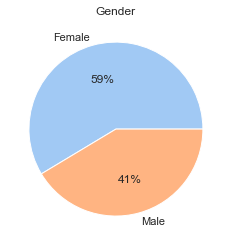

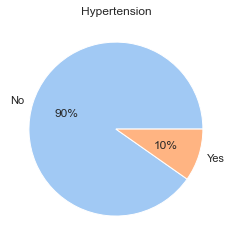

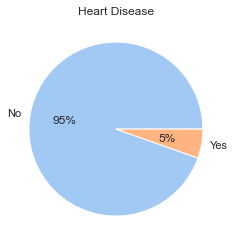

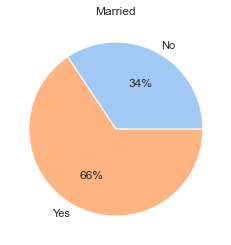

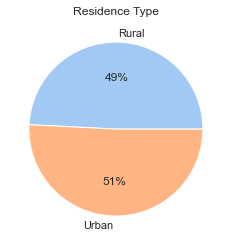

<Figure size 432x288 with 0 Axes>

In [108]:
# Plot pie charts of binary categories
list_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
title = ["Gender", "Hypertension", "Heart Disease", "Married", "Residence Type"]
labels = [None, ['No', 'Yes'], ['No', 'Yes'], None, None]
cnt = 0
for variable_name in list_variables:
    plot_pie(variable_name, title[cnt], labels[cnt])
    cnt = cnt + 1

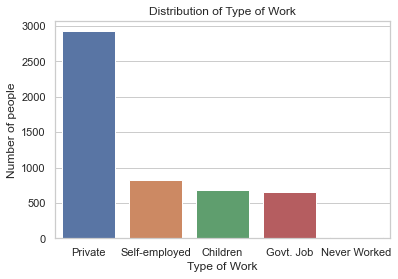

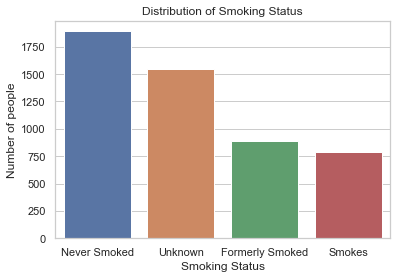

<Figure size 432x288 with 0 Axes>

In [109]:
# Plot bar chart of multiple categories
list_variables = ['work_type', 'smoking_status']
label = ["Type of Work", "Smoking Status"]
x_labels = [['Private', 'Self-employed', 'Children', 'Govt. Job', 'Never Worked'], [ 'Never Smoked','Unknown', 'Formerly Smoked', 'Smokes']]
rotate_label = [False, False]
cnt = 0
for variable_name in list_variables:
    plot_chart(variable_name, label[cnt], rotate_label[cnt], x_labels[cnt])
    cnt = cnt + 1

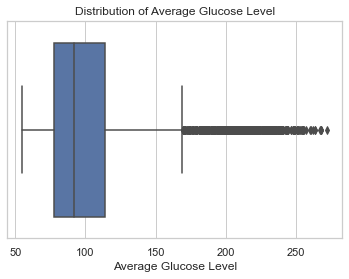

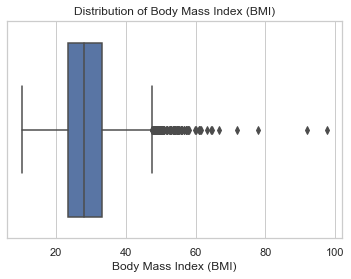

<Figure size 432x288 with 0 Axes>

In [110]:
# Plot box whisker plot of numerical values
list_variables = ['avg_glucose_level', 'bmi']
label = ['Average Glucose Level', 'Body Mass Index (BMI)']
cnt = 0
for variable_name in list_variables:
    plot_boxplot(variable_name, label[cnt])
    cnt = cnt + 1

In [111]:
# Remove the outliers in numerical values
list_variables = ['avg_glucose_level', 'bmi']
for variable in list_variables:
    q_low = data[variable].quantile(0.01)
    q_hi  = data[variable].quantile(0.99)
    data = data[(data[variable] < q_hi) & (data[variable] > q_low)]

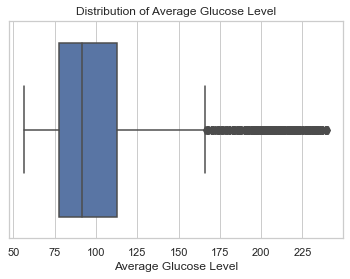

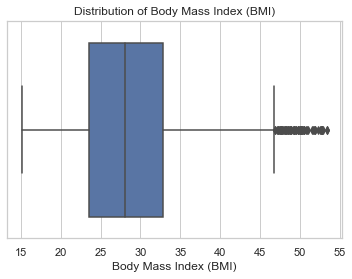

<Figure size 432x288 with 0 Axes>

In [112]:
# PLot box plot of numerical values and ensure the outliers are removed
list_variables = ['avg_glucose_level', 'bmi']
label = ['Average Glucose Level', 'Body Mass Index (BMI)']
cnt = 0
for variable_name in list_variables:
    plot_boxplot(variable_name, label[cnt])
    cnt = cnt + 1

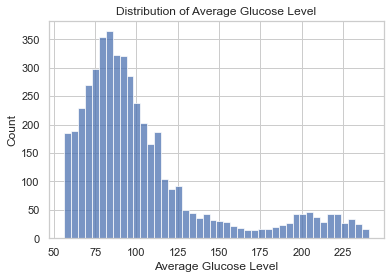

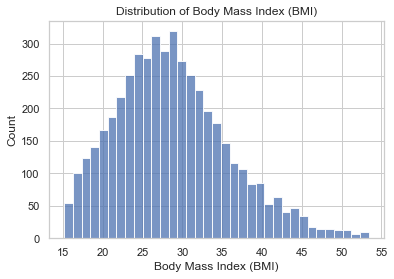

<Figure size 432x288 with 0 Axes>

In [113]:
# Plot histograms of numerical values
list_variables = ['avg_glucose_level', 'bmi']
label = ['Average Glucose Level', 'Body Mass Index (BMI)']
cnt = 0
for variable_name in list_variables:
    plot_histogram(variable_name, label[cnt])
    cnt = cnt + 1

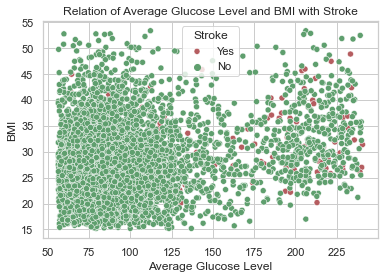

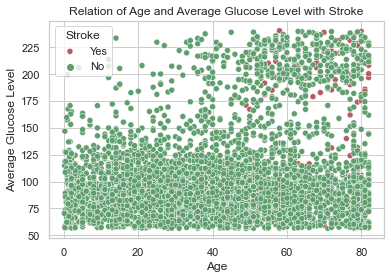

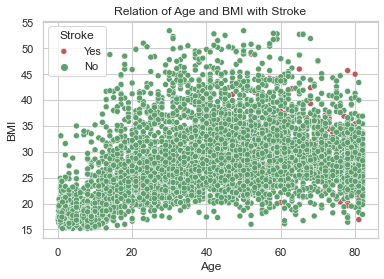

<Figure size 432x288 with 0 Axes>

In [114]:
# Plot scatter plot of numerical values with hue of stroke
list_variables = [("avg_glucose_level", "bmi"), ("age", "avg_glucose_level"), ("age", "bmi")]
labels = [("Average Glucose Level", "BMI"), ("Age","Average Glucose Level"), ("Age", "BMI") ]
count = 0
for variables in list_variables:
    plot_scatter(variables[0], variables[1], labels[count][0], labels[count][1])
    count = count + 1

In [115]:
# Replace the average glucose level with its logarithm as it is right skewed
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])

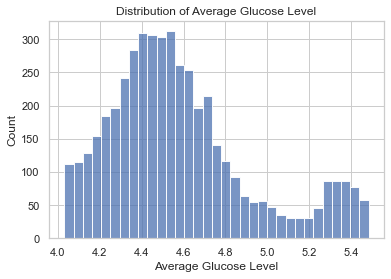

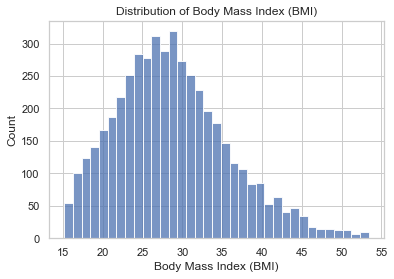

<Figure size 432x288 with 0 Axes>

In [116]:
# Ensure that numerical values are no longer skewed as before
list_variables = ['avg_glucose_level', 'bmi']
label = ['Average Glucose Level', 'Body Mass Index (BMI)']
cnt = 0
for variable_name in list_variables:
    plot_histogram(variable_name, label[cnt])
    cnt = cnt + 1

In [117]:
# Replace missing BMI values with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

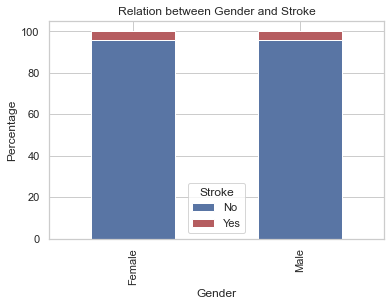

<Figure size 432x288 with 0 Axes>

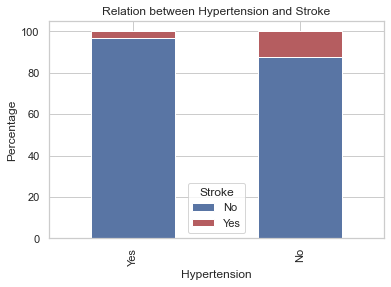

<Figure size 432x288 with 0 Axes>

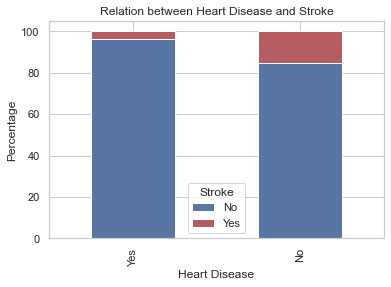

<Figure size 432x288 with 0 Axes>

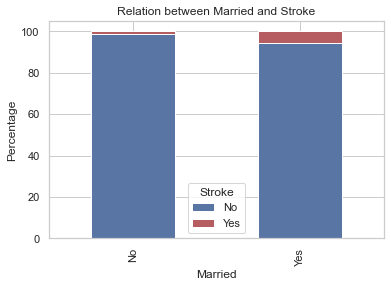

<Figure size 432x288 with 0 Axes>

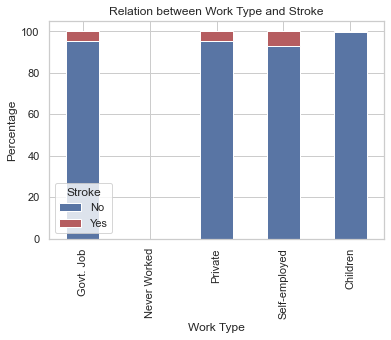

<Figure size 432x288 with 0 Axes>

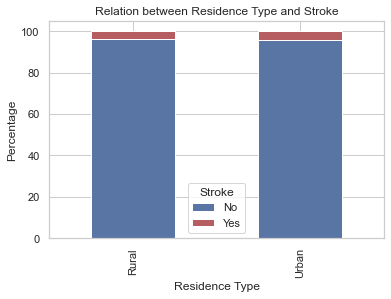

<Figure size 432x288 with 0 Axes>

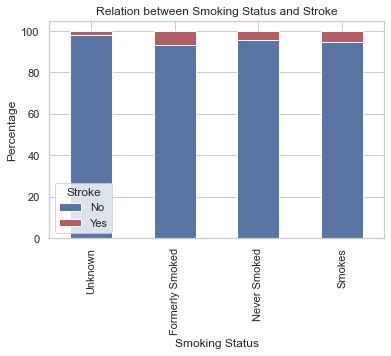

<Figure size 432x288 with 0 Axes>

In [118]:
# Plot the relation of different categorical variables and stroke in bar chart
list_variables = data.columns.drop(['id', 'age', 'avg_glucose_level', 'bmi', 'stroke'])
label = ['Gender', "Hypertension", "Heart Disease", "Married", "Work Type", "Residence Type", "Smoking Status"]
x_labels = [None, ['Yes', 'No'], ['Yes', 'No'], None, ['Govt. Job', 'Never Worked', 'Private', 'Self-employed', 'Children'], None, [ 'Unknown', 'Formerly Smoked', 'Never Smoked', 'Smokes']]
cnt = 0
for variable_name in list_variables:
    plot_relation_chart(variable_name, label[cnt], x_labels[cnt])
    cnt = cnt + 1

In [119]:
# Standardise the numerical values
data.loc[:, data.columns == 'bmi'] = preprocessing.scale(data.loc[:, data.columns  == 'bmi'], axis=0)
data.loc[:, data.columns == 'avg_glucose_level'] = preprocessing.scale(data.loc[:, data.columns  == 'avg_glucose_level'], axis=0)

In [120]:
# Check if they have been standardised
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4707.000000,4707.000000,4707.000000,4707.000000,4.707000e+03,4.707000e+03,4707.000000
mean,36920.263437,43.048345,0.089229,0.049501,-4.775704e-16,-1.595636e-16,0.042065
std,20944.708885,22.350624,0.285104,0.216934,1.000106e+00,1.000106e+00,0.200759
min,77.000000,0.080000,0.000000,0.000000,-1.608167e+00,-1.909247e+00,0.000000
25%,18421.000000,25.000000,0.000000,0.000000,-6.811475e-01,-7.252973e-01,0.000000
50%,37320.000000,44.000000,0.000000,0.000000,-1.866216e-01,-9.103871e-02,0.000000
75%,54821.500000,60.000000,0.000000,0.000000,4.220070e-01,5.855038e-01,0.000000
max,72940.000000,82.000000,1.000000,1.000000,2.630167e+00,3.474904e+00,1.000000


### Data Modeling

In [121]:
# Get X and y values and create dummies of categorical variables
X, y = data.drop(['id', 'stroke'], axis = 1), data['stroke']
X = pd.get_dummies(X, drop_first=True)

In [122]:
# Split the data into train and test set with split ration of 80:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [123]:
# Oversample the training data
# Dont oversample the test data as test data have to represent the real world distribution of outcome variable
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

In [124]:
# Different models to train and test
models = []
models.append(['Logistic Regression',LogisticRegression(solver ='lbfgs', random_state=42, max_iter=1000)])
models.append(['Support Vector Machine',SVC(probability = True, random_state=42)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['SGD Classifier', SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=42)])
models.append(['RandomForest',RandomForestClassifier(random_state=42)])
models.append(["Hard Voting", VotingClassifier(estimators=[(models[0][0], models[0][1]), (models[1][0], models[1][1]), (models[2][0], models[2][1]), (models[3][0], models[3][1]), (models[4][0], models[4][1]), (models[5][0], models[5][1])], voting='hard')])
models.append(["Hard Voting(Selective)", VotingClassifier(estimators=[(models[3][0], models[3][1]), (models[1][0], models[1][1]), (models[2][0], models[2][1])], voting='hard')])
models.append(["Soft Voting", VotingClassifier(estimators=[(models[0][0], models[0][1]), (models[1][0], models[1][1]), (models[2][0], models[2][1]), (models[3][0], CalibratedClassifierCV(models[3][1])), (models[4][0], models[4][1]), (models[5][0], models[5][1])], voting='soft')])
models.append(["Soft Voting(Selective)", VotingClassifier(estimators=[(models[3][0], CalibratedClassifierCV(models[3][1])), (models[1][0], models[1][1]), (models[2][0], models[2][1])], voting='soft')])

In [ ]:
lst_1 = []
c_matrix = {}
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm =confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)
#     y_scores = cross_val_predict(model, X_train_res, y_train_res, cv=10, method="decision_function")
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
#     fpr, tpr, thresholds = roc_curve(y_train_res, y_scores)
    print("Training and testing", models[m][0])
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
#     plot_roc_curve(fpr, tpr)
    plot_cm(y_test, y_pred, cm)
    c_matrix[models[m][0]] = cm
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
    print('-'*40)
    print('')
    print('')
    print('')
    print('')

In [212]:
df_result = pd.DataFrame(lst_1, columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC AUC','Precision','Recall','F1 Score'])
df_result.sort_values(by=['Recall','ROC AUC'],inplace=True,ascending=False)
df_result

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC AUC,Precision,Recall,F1 Score
1,SVM,69.108280,78.177531,1.910038,0.740712,0.110410,0.795455,0.193906
9,Soft Voting(Selective),79.723992,86.983924,1.571835,0.699129,0.130653,0.590909,0.213992
7,Hard Voting(Selective),81.422505,84.048478,2.396933,0.686424,0.134078,0.545455,0.215247
2,KNeigbors,81.634820,91.221308,1.169403,0.622697,0.109091,0.409091,0.172249
3,SGD Classifier,87.367304,77.998318,5.071759,0.631150,0.149533,0.363636,0.211921
0,Logistic Regression,81.740977,85.434018,3.288032,0.590833,0.094937,0.340909,0.148515
8,Soft Voting,85.562633,93.215672,2.079825,0.589264,0.110169,0.295455,0.160494
6,Hard Voting,88.216561,91.498833,2.632484,0.570763,0.114943,0.227273,0.152672
4,DecisionTree,89.278132,93.589940,2.636413,0.554718,0.109589,0.181818,0.136752
5,RandomForest,90.658174,95.971521,2.950467,0.529535,0.092593,0.113636,0.102041


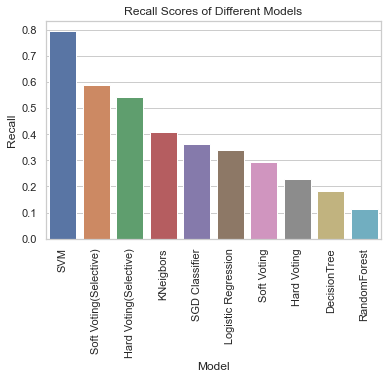

In [213]:
plot_result('Recall', df_result)

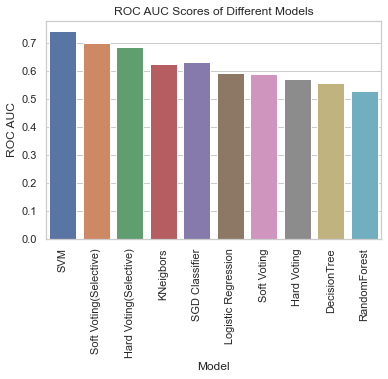

In [214]:
plot_result('ROC AUC', df_result)